In [26]:
%matplotlib inline
import pandas as PandaLib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn import tree
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import math as mt
from collections import Counter
import pydotplus
import StringIO
from scipy import misc
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor

#OpenFile = PandaLib.read_csv('D:/study/Data Analytics\Project_Data_And_Code/Traffic_data.csv')
OpenFile  = PandaLib.read_csv('D:/study/Data Analytics/Project_Data_And_Code/Traffic_data.csv',low_memory='False')
#Remove All the missing values 
ConvertToDataFrame = PandaLib.DataFrame(OpenFile)
ConvertToNan1 =ConvertToDataFrame.replace('UU',np.NaN)
ConvertToNan2 =ConvertToNan1.replace('UUUU',np.NaN)
ConvertToNan3 = ConvertToNan2.replace('NN' ,np.NaN)
ConvertToNan4 = ConvertToNan3.replace('NNNN',np.NaN)
ConvertToNan5 = ConvertToNan4.replace('N',np.NaN)
ConvertToNan6 = ConvertToNan5.replace('QQ',np.NaN)
ConvertToNan7 = ConvertToNan6.replace('N',np.NaN)
ConvertToNan8 = ConvertToNan7.replace('U',np.NaN)
ConvertToNan9 = ConvertToNan8.replace('Q',np.NaN)
ConvertToDataFrameFinal = PandaLib.DataFrame(ConvertToNan9)
CLeanedData =ConvertToDataFrameFinal.dropna(axis=0,how='any')
CLeanedData.drop(['Road_Alignment'],axis = 1, inplace = True)
CLeanedData.drop(['Vehicle_ ID'],axis = 1, inplace = True)
CLeanedData.drop(['Person_Sex'],axis = 1, inplace = True)
CLeanedData = CLeanedData.sample(50000)

#converting all the object types into numeric ones
List_Of_variables = ['Collision_Month', 'Day_of_the_week','Collision_Hour','No_of_vehicles_in_collision','No_of_vehicles_in_collision',
                     'Collision_Configuration','Roadway_collision','weather_condition','Road_Surface','Traffic_control',
                    'Vehicle_Type','Vehicle_Year_ Model','Person_ID','Person_Position','Medical_Treatment_required',
                    'Safety_Device_Required','Road_User_Class','Person_Age']

for each in List_Of_variables:
    CLeanedData[each] = PandaLib.to_numeric(CLeanedData[each])


C:\Users\shreyas prasadh\Anaconda2\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\shreyas prasadh\Anaconda2\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\shreyas prasadh\Anaconda2\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [27]:
# Divide data into train test 
TrainingData, TestingData = train_test_split(CLeanedData, test_size=0.3)
TrainingData = TrainingData.dropna(axis=0,how='any')
print TrainingData.info()
print TrainingData.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35000 entries, 226971 to 32846
Data columns (total 19 columns):
Year                           35000 non-null int64
Collision_Month                35000 non-null int64
Day_of_the_week                35000 non-null int64
Collision_Hour                 35000 non-null int64
Collision_Severe               35000 non-null int64
No_of_vehicles_in_collision    35000 non-null int64
Collision_Configuration        35000 non-null int64
Roadway_collision              35000 non-null int64
weather_condition              35000 non-null int64
Road_Surface                   35000 non-null int64
Traffic_control                35000 non-null int64
Vehicle_Type                   35000 non-null int64
Vehicle_Year_ Model            35000 non-null int64
Person_ID                      35000 non-null int64
Person_Age                     35000 non-null int64
Person_Position                35000 non-null int64
Medical_Treatment_required     35000 non-null int64
Sa

,Year,Collision_Month,Day_of_the_week,Collision_Hour,No_of_vehicles_in_collision,Collision_Configuration,Roadway_collision,weather_condition,Road_Surface,Traffic_control,Vehicle_Type,Vehicle_Year_ Model,Person_ID,Person_Age,Person_Position,Medical_Treatment_required,Safety_Device_Required,Road_User_Class
Collision_Severe,,,,,,,,,,,,,,,,,,
1,2014.0,6.870103,4.309278,13.061856,2.503093,22.162887,1.422680,1.645361,1.668041,14.536082,3.020619,2005.952577,1.538144,42.919588,13.872165,2.177320,2.773196,1.573196
2,2014.0,6.624163,3.940808,13.666985,2.126409,23.763204,1.694394,1.623352,1.654121,10.166565,1.756425,2006.282312,1.503810,38.472200,13.238476,1.565204,2.388440,1.379893


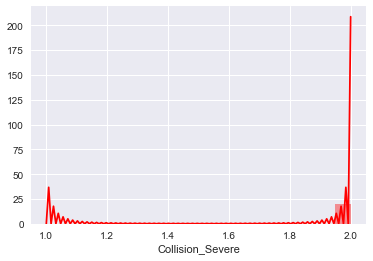

In [28]:
#we are focusing on weather condition so plotting the graph and analysing 
Collision_fatalities = 'Collision_Severe'
sns.distplot(TrainingData[Collision_fatalities], bins=20,color='red')
TrainingData[Collision_fatalities].value_counts()
TrainingData.groupby(Collision_fatalities).mean()

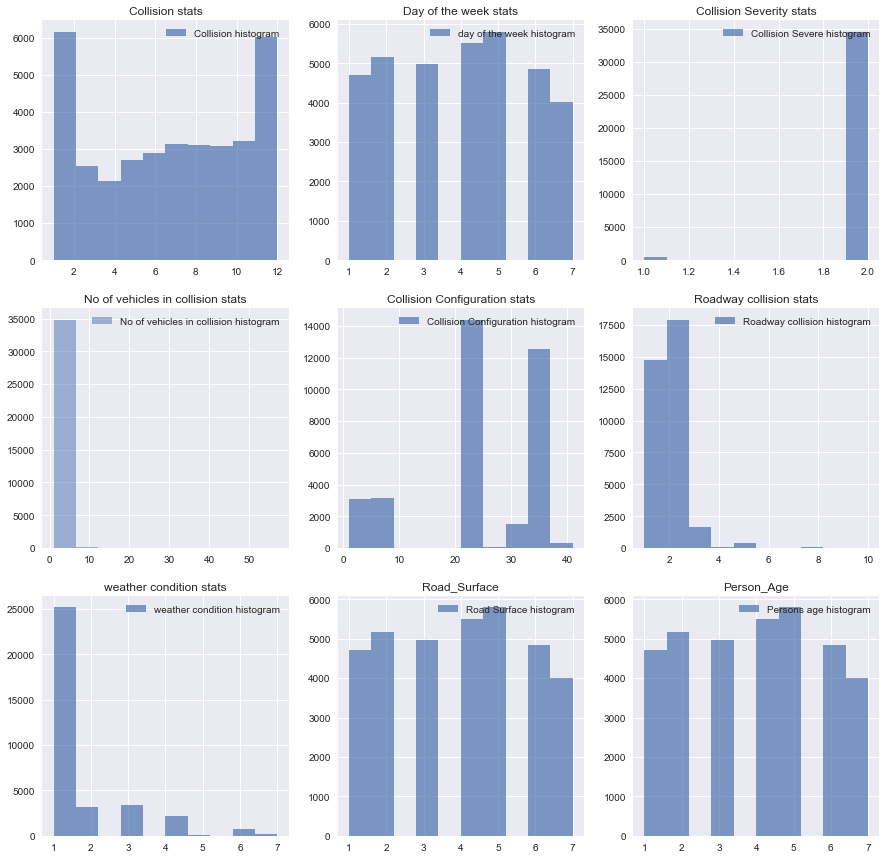

In [29]:
#Visualising the data
#Visualize data . The goal is to give an idea of how other variable graphs looks like which might be of significance in the future
#collision monthwise
fig = plt.figure(figsize=(15,15))
FirstGraph = fig.add_subplot(331)
FirstGraph.set_title("Collision stats")
Collision_Data = TrainingData['Collision_Month']
Collision_Data.hist(alpha=0.7,label = 'Collision histogram')
FirstGraph.legend(loc='upper right')

#Day Of the week
SecondGraph = fig.add_subplot(332)
SecondGraph.set_title("Day of the week stats")
WeekDay_Data = TrainingData['Day_of_the_week']
WeekDay_Data.hist(alpha=0.7,label = 'day of the week histogram')
SecondGraph.legend(loc='upper right')

#Collision_Severity
ThirdGraph = fig.add_subplot(333)
ThirdGraph.set_title("Collision Severity stats")
Collision_Severity = TrainingData['Collision_Severe']
Collision_Severity.hist(alpha=0.7,label = 'Collision Severe histogram')
ThirdGraph.legend(loc='upper right')

#No of vehicles in collision
ForthGraph = fig.add_subplot(334)
ForthGraph.set_title("No of vehicles in collision stats")
No_of_vehicles_in_collision = TrainingData['No_of_vehicles_in_collision']
No_of_vehicles_in_collision.hist(alpha=0.5,label = 'No of vehicles in collision histogram')
ForthGraph.legend(loc='upper right')

#Collision Configuration
FifthGraph = fig.add_subplot(335)
FifthGraph.set_title("Collision Configuration stats")
Collision_Configuration = TrainingData['Collision_Configuration']
Collision_Configuration.hist(alpha=0.7,label = 'Collision Configuration histogram')
FifthGraph.legend(loc='upper right')

#Roadway collision
SixthGraph = fig.add_subplot(336)
SixthGraph.set_title("Roadway collision stats")
Roadway_collision = TrainingData['Roadway_collision']
Roadway_collision.hist(alpha=0.7,label = 'Roadway collision histogram')
SixthGraph.legend(loc='upper right')

#weather condition
SeventhGraph = fig.add_subplot(337)
SeventhGraph.set_title("weather condition stats")
weather_condition = TrainingData['weather_condition']
weather_condition.hist(alpha=0.7,label = 'weather condition histogram')
SeventhGraph.legend(loc='upper right')

#Road Surface
EighthGraph = fig.add_subplot(338)
EighthGraph.set_title("Road_Surface")
Road_Surface = TrainingData['Day_of_the_week']
Road_Surface.hist(alpha=0.7,label = 'Road Surface histogram')
EighthGraph.legend(loc='upper right')

#Person Age
NinthGraph = fig.add_subplot(339)
NinthGraph.set_title("Person_Age")
WeekDay_Data = TrainingData['Day_of_the_week']
WeekDay_Data.hist(alpha=0.7,label = 'Persons age histogram')
NinthGraph.legend(loc='upper right')



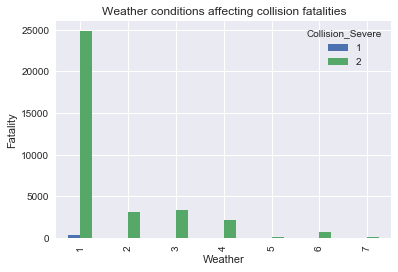

In [30]:
#Comparing factors againsts the fatalities graph to get an better understanding 
PandaLib.crosstab(TrainingData['weather_condition'],TrainingData[Collision_fatalities]).plot(kind='bar')
plt.title('Weather conditions affecting collision fatalities')
plt.xlabel('Weather')
plt.ylabel('Fatality')
plt.show()

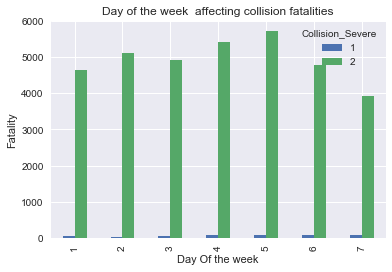

In [31]:
#Day of the week vs Severity
PandaLib.crosstab(TrainingData['Day_of_the_week'],TrainingData[Collision_fatalities]).plot(kind='bar')
plt.title('Day of the week  affecting collision fatalities')
plt.xlabel('Day Of the week')
plt.ylabel('Fatality')
plt.show()

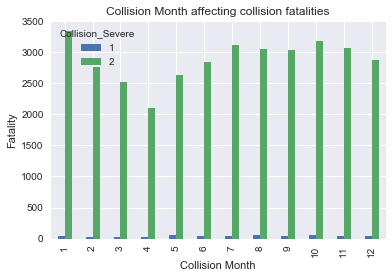

In [32]:
#Month 
PandaLib.crosstab(TrainingData['Collision_Month'],TrainingData[Collision_fatalities]).plot(kind='bar')
plt.title('Collision Month affecting collision fatalities')
plt.xlabel('Collision Month')
plt.ylabel('Fatality')
plt.show()
#With the above graphs we get an fair idea of what might be the important factors involving in the injuries or fatalities

In [33]:
#We define the features on which the processing should be done and divide them into training and testing data
Features =[]
for each in List_Of_variables :
    if each != Collision_fatalities :
        Features.append(each)
X_train = TrainingData[Features]
Y_train = TrainingData[Collision_fatalities]
X_Test = TestingData[Features]
Y_Test = TestingData[Collision_fatalities]


In [34]:
# Defining a function for importance
#This will be called in the future
def Importance(Input_Parameter):
    importances=Input_Parameter.feature_importances_
    f=np.argsort(importances)[::-1]
    print ('feature ranking:')
    for i in range(X_train.shape[1]):
         print ("feature no. {}: {} ({})".format(i+1,X_train.columns[f[i]],importances[f[i]]))
 

In [42]:
#Now applying logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
#we have to install ggplot through pip install
from ggplot import *
from sklearn.preprocessing import label_binarize
from sklearn import *
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

#This gives the importance of the features 
# import statsmodels.api as sm
# logit_model=sm.Logit(TrainingData[Features],TrainingData[Collision_fatalities])
# result=logit_model.fit()
# print(result.summary())

#we first take the mean out
Mean = TrainingData[Collision_fatalities].mean()
print "the mean of the data is " + str(Mean)
logistic = LogisticRegression()

#rfe = RFE(logistic,10)
#rfe = rfe.fit(X_train,Y_train)
#print(rfe.support_)
#print(rfe.ranking_)

#We now implement the logistic regression model
Logistic_fit = logistic.fit(X_train,Y_train)
Prediction_Model = Logistic_fit.predict(X_train)
score =accuracy_score(Y_train,Prediction_Model)
confusionMatrix = metrics.confusion_matrix(Y_train,Prediction_Model)
importance = Logistic_fit.coef_

print "The accuracy score is :" + str(score*100) + "\n"

#now finding the classification report
print(classification_report(Y_train, Prediction_Model))

#now we do cross validation just to check if the model does not overfit
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(logistic, X_train, Y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

the mean of the data is 1.98614285714
The accuracy score is :98.86

             precision    recall  f1-score   support

          1       0.98      0.18      0.31       485
          2       0.99      1.00      0.99     34515

avg / total       0.99      0.99      0.98     35000

10-fold cross validation average accuracy: 0.988


In [36]:
#As the accuracy is not so efficient we implement this on the test data anyways to get an estimate or idea
Logistic_fit_For_test = logistic.fit(X_Test,Y_Test) 
predict_test = Logistic_fit_For_test.predict(X_Test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logistic.score(X_Test, Y_Test)))
print(classification_report(Y_Test, predict_test))

Accuracy of logistic regression classifier on test set: 0.99
             precision    recall  f1-score   support

          1       0.97      0.19      0.32       190
          2       0.99      1.00      0.99     14810

avg / total       0.99      0.99      0.99     15000



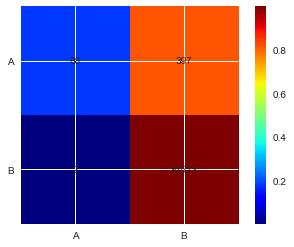

In [37]:
#Plotting the confusion matrix
#plotting confusion matrix
norm_conf = []
for i in confusionMatrix:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)
fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet,interpolation='nearest')
width, height = confusionMatrix.shape

for x in xrange(width):
    for y in xrange(height):
        ax.annotate(str(confusionMatrix[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')
cb = fig.colorbar(res)
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
plt.xticks(range(width), alphabet[:width])
plt.yticks(range(height), alphabet[:height])
plt.show()

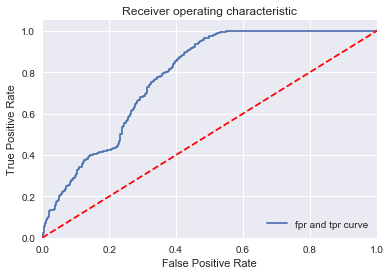

In [59]:
#this is the roc curve  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#ff = roc_curve(Y_train, Prediction_Model)
#logit_roc_auc = roc_auc_score(Y_train, Prediction_Model,pos_label = 2)
fpr, tpr, thresholds = roc_curve(Y_train, logistic.predict_proba(X_train)[:,1],pos_label = 2)
plt.figure()
plt.plot(fpr, tpr,label = 'fpr and tpr curve')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()